In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# Traemos los datos
df= pd.read_csv('D:\Desktop\PI02\df_train_final.csv')

In [3]:
columns_names = ['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long']


In [4]:
#Definimos variables
X= df[columns_names]
y= df[['low']]

In [5]:
#Separamos el modelo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(178493, 11) (178493, 1) (76497, 11) (76497, 1)


In [16]:
#Entrenamos el modelo y predecimos
clf = DecisionTreeClassifier() 
clf.fit(X_train.values,y_train.values)
y_pred = clf.predict(X_test.values)

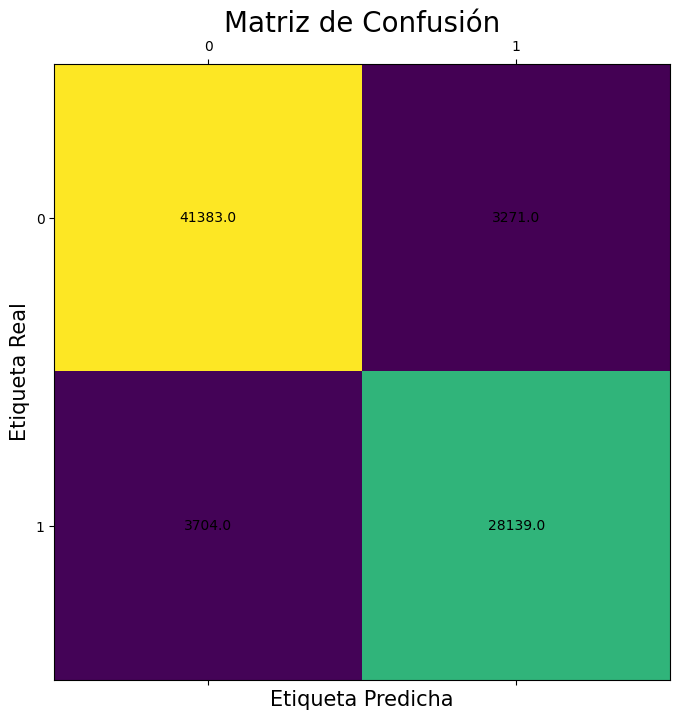

In [17]:
# Evaluamos graficamente con una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Real', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [18]:
# Evaluamos con metricas 
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Accuracy:  0.9088199537236754
Recall:  0.8836793015733442
F1 Score:  0.8897285504244857


In [9]:
# Vemos los feature con mas importancia
print('Feature importance: ', clf.feature_importances_)

Feature importance:  [0.21781176 0.02750814 0.0249596  0.00993776 0.01216305 0.01396123
 0.0066218  0.00190652 0.01088093 0.25085478 0.42339443]


## Random Forest para mejorar los hiperparámetros

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [5,30,50,100,200,350,500]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

5


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


50


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


200


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


350


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


500


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


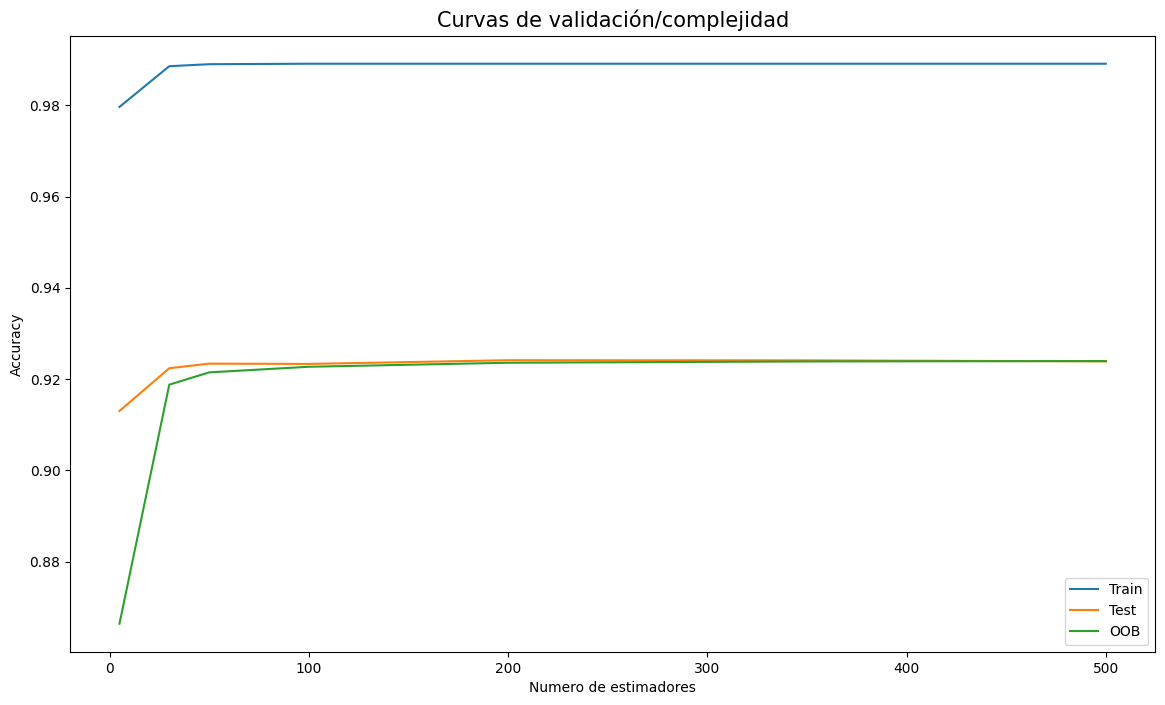

In [14]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de validación/complejidad', fontsize = 15)
# plt.xlim(0,50)
plt.show()

In [15]:
print(f"Valor óptimo de n_estimators: {N_estimadores[np.argmax(oob_scores)]}")


Valor óptimo de n_estimators: 500
